In [1]:
import pandas as pd
df1 = pd.read_csv("csat.csv")

In [2]:
# Convert datetime columns
df1['First Response Time'] = pd.to_datetime(df1['First Response Time'])
df1['Time to Resolution'] = pd.to_datetime(df1['Time to Resolution'])
df1['Date of Purchase'] = pd.to_datetime(df1['Date of Purchase'])

In [3]:
df1

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaT,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaT,NaN
2,3,Christopher Robbins,gonzalestracy@example.com,48,Other,Dell XPS,2020-07-14,Technical issue,Network problem,I'm facing a problem with my {product_purchase...,Closed,Case maybe show recently my computer follow.,Low,Social media,2023-06-01 11:14:38,2023-06-01 18:05:38,3.0
3,4,Christina Dillon,bradleyolson@example.org,27,Female,Microsoft Office,2020-11-13,Billing inquiry,Account access,I'm having an issue with the {product_purchase...,Closed,Try capital clearly never color toward story.,Low,Social media,2023-06-01 07:29:40,2023-06-01 01:57:40,3.0
4,5,Alexander Carroll,bradleymark@example.com,67,Female,Autodesk AutoCAD,2020-02-04,Billing inquiry,Data loss,I'm having an issue with the {product_purchase...,Closed,West decision evidence bit.,Low,Email,2023-06-01 00:12:42,2023-06-01 19:53:42,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8464,8465,David Todd,adam28@example.net,22,Female,LG OLED,2021-12-08,Product inquiry,Installation support,My {product_purchased} is making strange noise...,Open,NaN,Low,Phone,NaT,NaT,NaN
8465,8466,Lori Davis,russell68@example.com,27,Female,Bose SoundLink Speaker,2020-02-22,Technical issue,Refund request,I'm having an issue with the {product_purchase...,Open,NaN,Critical,Email,NaT,NaT,NaN
8466,8467,Michelle Kelley,ashley83@example.org,57,Female,GoPro Action Camera,2021-08-17,Technical issue,Account access,I'm having an issue with the {product_purchase...,Closed,Eight account century nature kitchen.,High,Social media,2023-06-01 09:44:22,2023-06-01 04:31:22,3.0
8467,8468,Steven Rodriguez,fpowell@example.org,54,Male,PlayStation,2021-10-16,Product inquiry,Payment issue,I'm having an issue with the {product_purchase...,Closed,We seat culture plan.,Medium,Email,2023-06-01 18:28:24,2023-06-01 05:32:24,3.0


In [4]:
from sklearn.utils import shuffle
# Keep only closed tickets
df = df1[df1['Ticket Status'].str.lower() == 'closed'].copy()

# Shuffle the dataset
df = shuffle(df, random_state=42).reset_index(drop=True)

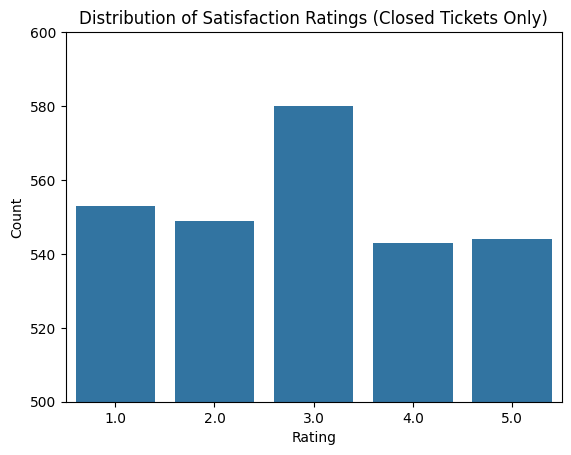

In [36]:
# we have 2 datsets. first, we will do data exploration and analysis.
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=df1[df1['Ticket Status'] == 'Closed'], x='Customer Satisfaction Rating')
plt.title("Distribution of Satisfaction Ratings (Closed Tickets Only)")
plt.ylim(500,600)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


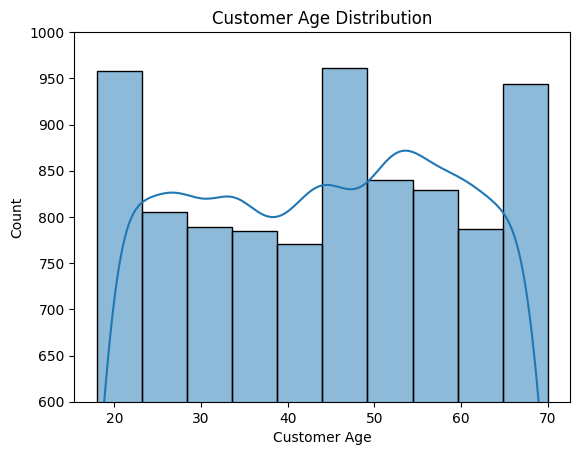

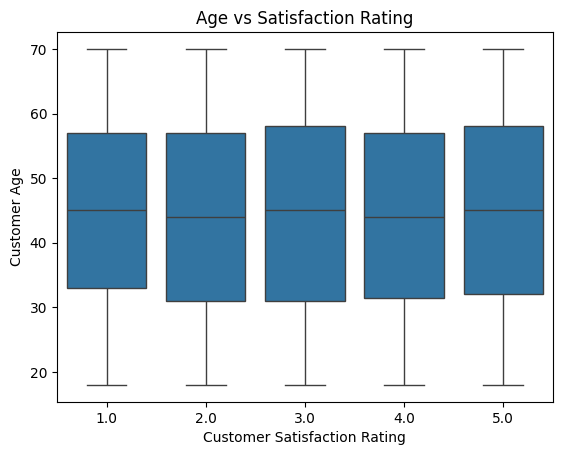

In [44]:
sns.histplot(df1['Customer Age'], bins=10, kde=True)
plt.title("Customer Age Distribution")
plt.ylim(600,1000)
plt.show()

sns.boxplot(x=df1['Customer Satisfaction Rating'], y=df1['Customer Age'])
plt.title("Age vs Satisfaction Rating")
plt.show()


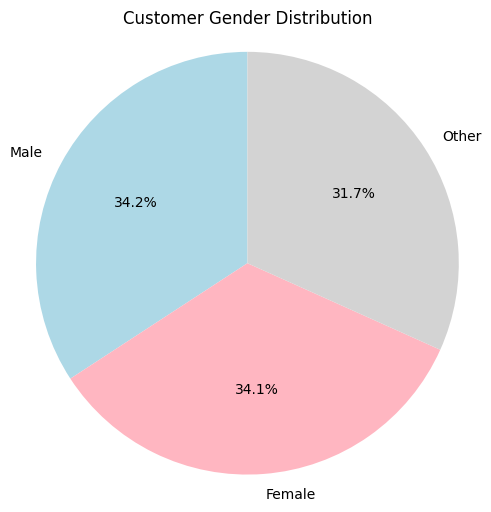

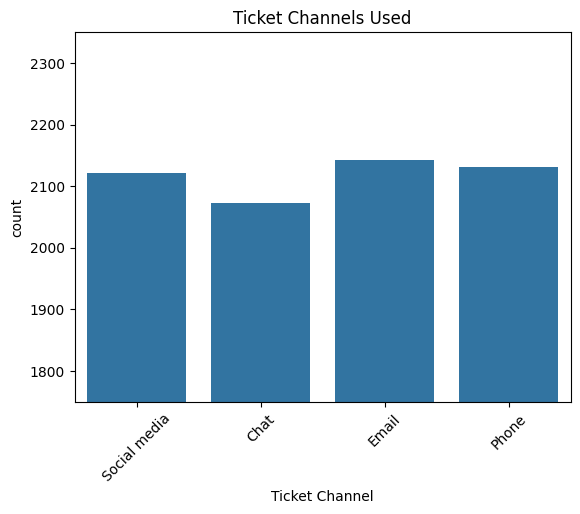

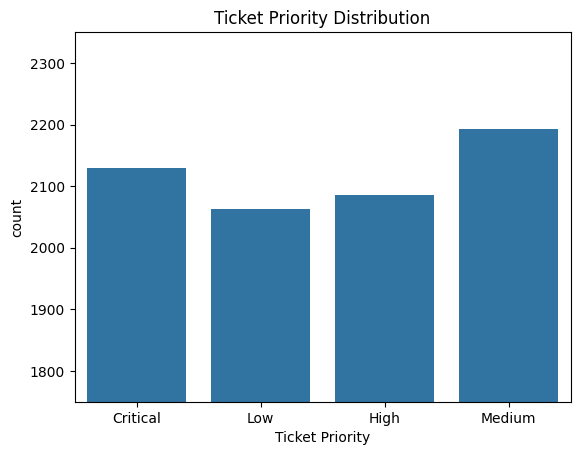

In [42]:
# Count gender occurrences
gender_counts = df1['Customer Gender'].value_counts()

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightpink', 'lightgray'])
plt.title("Customer Gender Distribution")
plt.axis('equal')  # Ensures the pie is a circle
plt.show()

sns.countplot(x='Ticket Channel', data=df1)
plt.title("Ticket Channels Used")
plt.ylim(1750,2350)
plt.xticks(rotation=45)
plt.show()

sns.countplot(x='Ticket Priority', data=df1)
plt.title("Ticket Priority Distribution")

plt.show()


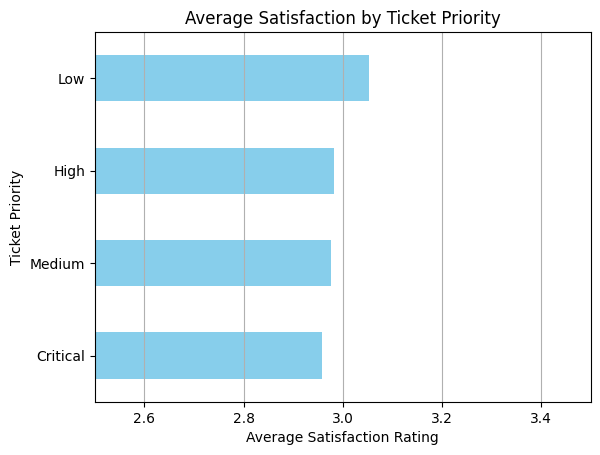

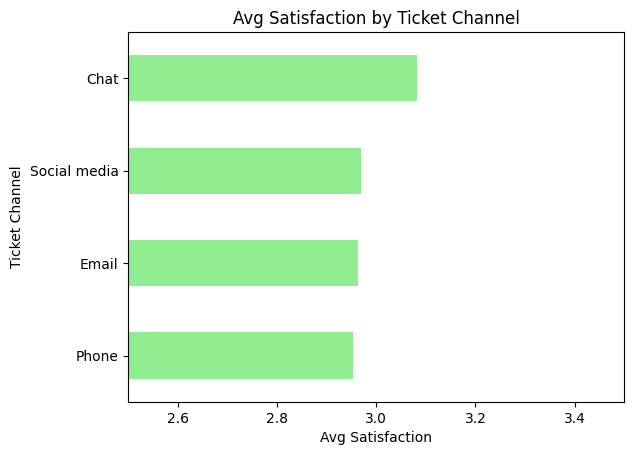

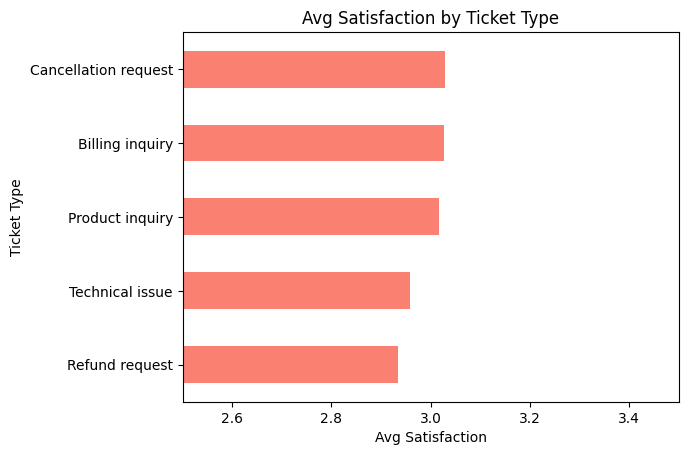

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter only closed tickets with valid ratings
df_closed = df1[df1['Ticket Status'] == 'Closed']

# Group by category and calculate mean rating
priority_rating = df1.groupby('Ticket Priority')['Customer Satisfaction Rating'].mean().sort_values()

# Plot horizontal bar chart
priority_rating.plot(kind='barh', color='skyblue')
plt.xlabel("Average Satisfaction Rating")
plt.title("Average Satisfaction by Ticket Priority")
plt.xlim(2.5, 3.5)
plt.grid(axis='x')
plt.show()

channel_rating = df1.groupby('Ticket Channel')['Customer Satisfaction Rating'].mean().sort_values()
channel_rating.plot(kind='barh', color='lightgreen')
plt.xlabel("Avg Satisfaction")
plt.title("Avg Satisfaction by Ticket Channel")
plt.xlim(2.5, 3.5)
plt.show()

type_rating = df1.groupby('Ticket Type')['Customer Satisfaction Rating'].mean().sort_values()
type_rating.plot(kind='barh', color='salmon')
plt.xlim(2.5, 3.5)
plt.xlabel("Avg Satisfaction")
plt.title("Avg Satisfaction by Ticket Type")
plt.show()


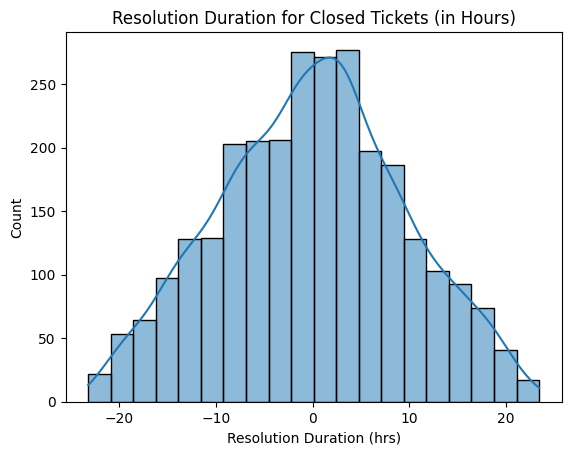

Standard Deviation (Resolution Time): 9:33:50


In [45]:
# Convert dates if not already
df1['Date of Purchase'] = pd.to_datetime(df1['Date of Purchase'])
df1['First Response Time'] = pd.to_datetime(df1['First Response Time'])
df1['Time to Resolution'] = pd.to_datetime(df1['Time to Resolution'])

# Time to resolve in hours
df1['Resolution Duration (hrs)'] = (df1['Time to Resolution'] - df1['First Response Time']).dt.total_seconds() / 3600

sns.histplot(df1[df1['Ticket Status']=='Closed']['Resolution Duration (hrs)'], bins=20, kde=True)
plt.title("Resolution Duration for Closed Tickets (in Hours)")
plt.show()

# Ensure both are datetime
df1['First Response Time'] = pd.to_datetime(df1['First Response Time'])
df1['Time to Resolution'] = pd.to_datetime(df1['Time to Resolution'])

# Compute time delta in seconds (or use .dt.total_seconds() / 3600 for hours)
df1['Resolution Duration'] = (df1['Time to Resolution'] - df1['First Response Time']).dt.total_seconds()

# Calculate standard deviation in seconds
std_seconds = df1['Resolution Duration'].std()

# Convert to readable format (hours, minutes, seconds)
import datetime
readable_std = str(datetime.timedelta(seconds=int(std_seconds)))

print("Standard Deviation (Resolution Time):", readable_std)


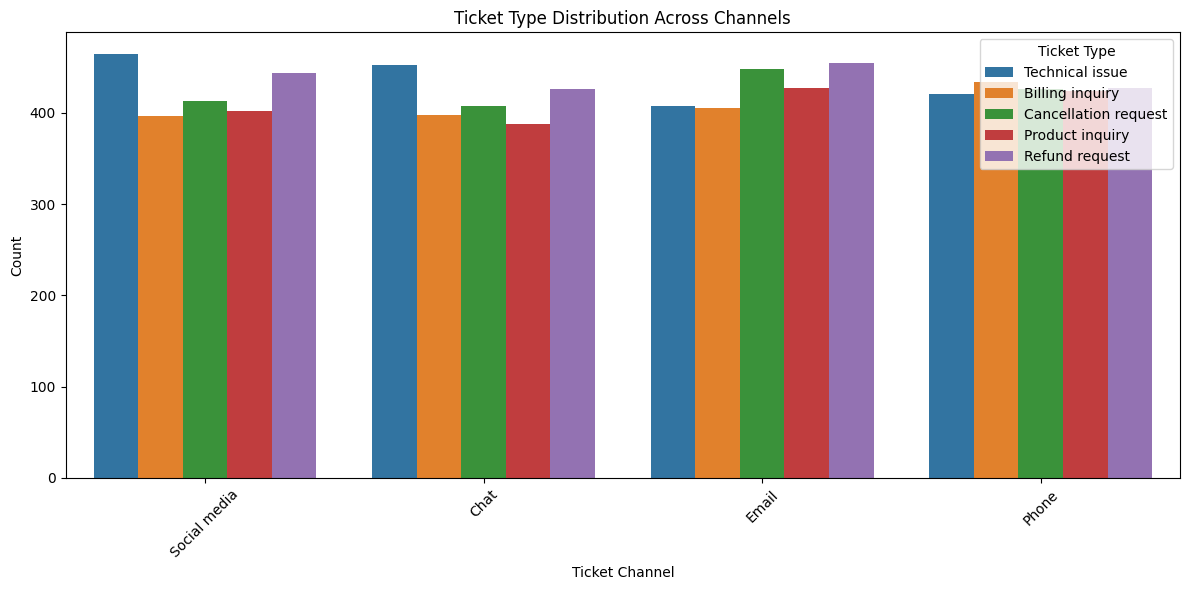

In [35]:

plt.figure(figsize=(12,6))
sns.countplot(data=df1, x='Ticket Channel', hue='Ticket Type')
plt.title("Ticket Type Distribution Across Channels")
plt.xlabel("Ticket Channel")
plt.ylabel("Count")
plt.legend(title='Ticket Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
'''THE CONCLUSIONS MADE THROUGH EDA DONE UNTIL NOW IS...
1. in Distribution of Satisfaction Ratings (Closed Tickets Only), we can say that 3 is mostly given rating
2. people around 20's, 45-50's, 65-70's orderes have spikes thus more ordering than other groups and we see no special relation in age and rating
3. men, women and others...everybody orders in equal quantity!
4. Low Priority and Channel used as Chat have higher avarage rating than any other possible way, due to ease of conversation.
5. 68% of orders queries are resolved within 9.5 hrs
6. Ticket Type Distribution Across Channels is more or less same. no significant change'''

In [5]:
# from here now we will do steps for model training
closed_count = (df1['Ticket Status'] == 'Closed').sum()
other_count = (df1['Ticket Status'] != 'Closed').sum()

print("Closed Tickets:", closed_count)
print("Other Tickets:", other_count)


Closed Tickets: 2769
Other Tickets: 5700


In [6]:
non_null_count = df1['Customer Satisfaction Rating'].notna().sum()
print("Number of entries with a rating:", non_null_count)

Number of entries with a rating: 2769


In [7]:
df['Product Purchased'].value_counts()

Product Purchased
Canon EOS                         83
iPhone                            82
Canon DSLR Camera                 81
GoPro Hero                        80
Microsoft Office                  80
Sony Xperia                       78
Sony 4K HDR TV                    74
Apple AirPods                     74
LG OLED                           73
Nest Thermostat                   73
Amazon Echo                       72
Garmin Forerunner                 70
Roomba Robot Vacuum               70
Nikon D                           69
Google Pixel                      69
Bose QuietComfort                 68
LG Washing Machine                68
LG Smart TV                       68
Philips Hue Lights                68
Amazon Kindle                     66
Sony PlayStation                  65
PlayStation                       65
Bose SoundLink Speaker            64
Autodesk AutoCAD                  64
Google Nest                       63
Fitbit Versa Smartwatch           63
Adobe Photoshop     

In [8]:
import pandas as pd

# Make sure the columns are in datetime format
df['First Response Time'] = pd.to_datetime(df['First Response Time'])
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'])

# Calculate resolution time in hours
df['Resolution Time'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

df.drop(['First Response Time', 'Time to Resolution'], axis=1, inplace=True)

In [9]:
df.drop(['Ticket ID', 'Customer Name', 'Customer Email', 'Customer Age'], axis=1, inplace=True)

In [10]:
df.drop(['Date of Purchase', 'Ticket Description', 'Resolution'], axis=1, inplace=True)

In [11]:
# Convert negative resolution times to positive
df['Resolution Time'] = df['Resolution Time'].abs()

In [12]:
df['Satisfaction'] = df['Customer Satisfaction Rating'].apply(lambda x: 1 if x >= 3 else 0)

In [13]:
# Create the mapping dictionary:
product_to_category = {
    'Canon EOS': 'Camera',
    'Canon DSLR Camera': 'Camera',
    'Nikon D': 'Camera',
    'GoPro Hero': 'Camera',
    'GoPro Action Camera': 'Camera',
    'iPhone': 'Smartphone',
    'Sony Xperia': 'Smartphone',
    'Google Pixel': 'Smartphone',
    'Samsung Galaxy': 'Smartphone',
    'Apple AirPods': 'Audio',
    'Bose QuietComfort': 'Audio',
    'Bose SoundLink Speaker': 'Audio',
    'Samsung Soundbar': 'Audio',
    'Sony 4K HDR TV': 'TV',
    'LG OLED': 'TV',
    'LG Smart TV': 'TV',
    'Nest Thermostat': 'Smart Home',
    'Philips Hue Lights': 'Smart Home',
    'Amazon Echo': 'Smart Home',
    'Google Nest': 'Smart Home',
    'Garmin Forerunner': 'Wearable',
    'Fitbit Versa Smartwatch': 'Wearable',
    'Fitbit Charge': 'Wearable',
    'Roomba Robot Vacuum': 'Home Appliance',
    'LG Washing Machine': 'Home Appliance',
    'Dyson Vacuum Cleaner': 'Home Appliance',
    'Microsoft Office': 'Software',
    'Adobe Photoshop': 'Software',
    'Autodesk AutoCAD': 'Software',
    'Sony PlayStation': 'Gaming Accessory',
    'PlayStation': 'Gaming Accessory',
    'Xbox': 'Gaming Accessory',
    'Microsoft Xbox Controller': 'Gaming Accessory',
    'Nintendo Switch': 'Gaming Accessory',
    'Nintendo Switch Pro Controller': 'Gaming Accessory',
    'MacBook Pro': 'Laptop',
    'Dell XPS': 'Laptop',
    'Lenovo ThinkPad': 'Laptop',
    'HP Pavilion': 'Laptop',
    'Asus ROG': 'Laptop',
    'Microsoft Surface': 'Laptop',
}

# Map the product categories
df['Product Category'] = df['Product Purchased'].map(product_to_category)

# For any products not in the dictionary, assign 'Other'
df['Product Category'] = df['Product Category'].fillna('Other')

df.drop(['Product Purchased'], axis=1, inplace=True)

In [14]:
df

,Customer Gender,Ticket Type,Ticket Subject,Ticket Status,Ticket Priority,Ticket Channel,Customer Satisfaction Rating,Resolution Time,Satisfaction,Product Category
0,Other,Cancellation request,Peripheral compatibility,Closed,Low,Social media,1.0,3.800000,0,Gaming Accessory
1,Other,Technical issue,Hardware issue,Closed,Medium,Chat,3.0,14.050000,1,TV
2,Other,Technical issue,Installation support,Closed,High,Social media,2.0,19.450000,0,Camera
3,Female,Billing inquiry,Installation support,Closed,Low,Chat,2.0,7.433333,0,Camera
4,Female,Billing inquiry,Software bug,Closed,Medium,Chat,4.0,6.516667,1,Home Appliance
...,...,...,...,...,...,...,...,...,...,...
2764,Other,Refund request,Payment issue,Closed,Low,Email,3.0,10.600000,1,Smart Home
2765,Male,Refund request,Hardware issue,Closed,High,Phone,1.0,15.733333,0,Software
2766,Other,Product inquiry,Product compatibility,Closed,Critical,Chat,5.0,2.366667,1,Smartphone
2767,Other,Technical issue,Hardware issue,Closed,Medium,Phone,4.0,7.083333,1,Laptop


In [15]:
from sklearn.preprocessing import LabelEncoder

# Drop unnecessary columns
df = df.drop(['Customer Satisfaction Rating', 'Ticket Status'], axis=1)

# Ordinal encode Ticket Priority
priority_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Ticket Priority'] = df['Ticket Priority'].map(priority_map)

# Label encode other categorical features
label_cols = ['Customer Gender', 'Ticket Type', 'Ticket Channel']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le_product = LabelEncoder()

# Apply label encoding to 'Product Category'
df['Product Category'] = le_product.fit_transform(df['Product Category'])


In [18]:
df.drop(['Ticket Subject'], axis=1, inplace=True)

In [16]:
df['Ticket Priority'] = df['Ticket Priority'].ffill()

In [17]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Apply encoding
df['Ticket Subject Encoded'] = le.fit_transform(df['Ticket Subject'])

In [19]:
df

,Customer Gender,Ticket Type,Ticket Priority,Ticket Channel,Resolution Time,Satisfaction,Product Category,Ticket Subject Encoded
0,2,1,1.0,3,3.800000,0,2,10
1,2,4,2.0,0,14.050000,1,9,6
2,2,4,3.0,3,19.450000,0,1,7
3,0,0,1.0,0,7.433333,0,1,7
4,0,0,2.0,0,6.516667,1,3,15
...,...,...,...,...,...,...,...,...
2764,2,3,1.0,1,10.600000,1,6,9
2765,1,3,3.0,2,15.733333,0,8,6
2766,2,2,3.0,0,2.366667,1,7,11
2767,2,4,2.0,2,7.083333,1,4,6


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# --- STEP 1: Define Features and Target ---
X = df.drop(columns=['Satisfaction'])
y = df['Satisfaction']

# --- STEP 2: Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42
)

# --- STEP 3: Apply SMOTE on training data only ---
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# --- STEP 4: Scale only 'Resolution Time' ---
scaler = StandardScaler()

X_train_scaled = X_train_resampled.copy()
X_test_scaled = X_test.copy()

X_train_scaled['Resolution Time'] = scaler.fit_transform(X_train_resampled[['Resolution Time']])
X_test_scaled['Resolution Time'] = scaler.transform(X_test[['Resolution Time']])

# --- STEP 5: Train Models ---

# SGDClassifier (needs scaled data)
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_scaled, y_train_resampled)
y_pred_sgd = sgd.predict(X_test_scaled)

# Random Forest (doesn't need scaling)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = rf.predict(X_test)

# XGBoost (doesn't need scaling)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = xgb.predict(X_test)

# --- STEP 6: Evaluate Models ---
def evaluate_model(name, y_true, y_pred):
    print(f"\n--- {name} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))

evaluate_model("SGD Classifier", y_test, y_pred_sgd)
evaluate_model("Random Forest", y_test, y_pred_rf)
evaluate_model("XGBoost", y_test, y_pred_xgb)



--- SGD Classifier ---
Confusion Matrix:
 [[269   7]
 [405  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.97      0.57       276
           1       0.63      0.03      0.06       417

    accuracy                           0.41       693
   macro avg       0.52      0.50      0.31       693
weighted avg       0.54      0.41      0.26       693


--- Random Forest ---
Confusion Matrix:
 [[100 176]
 [150 267]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.36      0.38       276
           1       0.60      0.64      0.62       417

    accuracy                           0.53       693
   macro avg       0.50      0.50      0.50       693
weighted avg       0.52      0.53      0.53       693


--- XGBoost ---
Confusion Matrix:
 [[104 172]
 [153 264]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      

In [22]:
from sklearn.model_selection import GridSearchCV

# --- Random Forest Grid ---
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='f1'
)

rf_grid_search.fit(X_train_resampled, y_train_resampled)  # Your SMOTE data

print("Best RF Params:", rf_grid_search.best_params_)
print("Best RF F1 Score:", rf_grid_search.best_score_)


# --- XGBoost Grid ---
xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 1.5]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

xgb_grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_param_grid,
    cv=5,
    verbose=2,
    n_jobs=-1,
    scoring='f1'
)

xgb_grid_search.fit(X_train_resampled, y_train_resampled)

print("Best XGB Params:", xgb_grid_search.best_params_)
print("Best XGB F1 Score:", xgb_grid_search.best_score_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best RF Params: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Best RF F1 Score: 0.654612360139647
Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best XGB Params: {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1.5, 'subsample': 0.8}
Best XGB F1 Score: 0.6420987895379939


In [23]:
# Retrain Random Forest with best params
best_rf = RandomForestClassifier(
    bootstrap=True,
    max_depth=10,
    min_samples_leaf=1,
    min_samples_split=5,
    n_estimators=200,
    random_state=42
)
best_rf.fit(X_train_resampled, y_train_resampled)
y_pred_rf = best_rf.predict(X_test)

print("\n--- Tuned Random Forest ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


# Retrain XGBoost with best params
best_xgb = XGBClassifier(
    colsample_bytree=1.0,
    gamma=0.1,
    learning_rate=0.01,
    max_depth=7,
    n_estimators=200,
    reg_alpha=0,
    reg_lambda=1.5,
    subsample=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
best_xgb.fit(X_train_resampled, y_train_resampled)
y_pred_xgb = best_xgb.predict(X_test)

print("\n--- Tuned XGBoost ---")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))



--- Tuned Random Forest ---
Confusion Matrix:
 [[ 92 184]
 [138 279]]
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.33      0.36       276
           1       0.60      0.67      0.63       417

    accuracy                           0.54       693
   macro avg       0.50      0.50      0.50       693
weighted avg       0.52      0.54      0.53       693


--- Tuned XGBoost ---
Confusion Matrix:
 [[ 86 190]
 [136 281]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.31      0.35       276
           1       0.60      0.67      0.63       417

    accuracy                           0.53       693
   macro avg       0.49      0.49      0.49       693
weighted avg       0.51      0.53      0.52       693



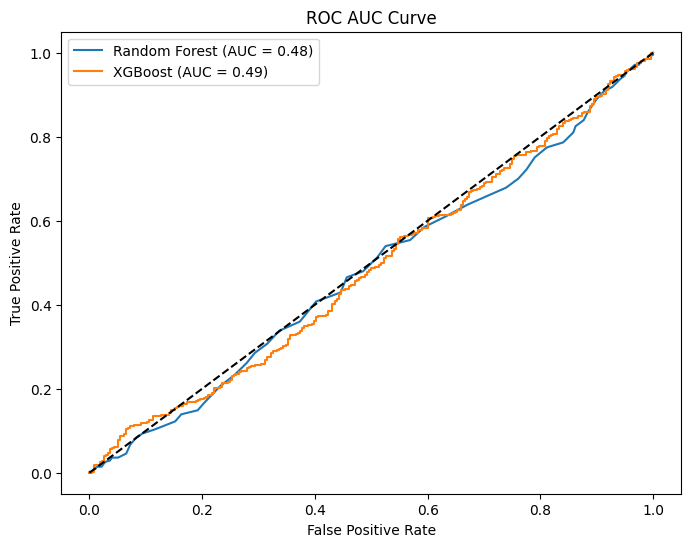

In [26]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit only RF and XGB on training data (unscaled)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Predict probabilities for the positive class
y_scores_rf = rf.predict_proba(X_test)[:, 1]
y_scores_xgb = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for RF
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_scores_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Compute ROC curve and AUC for XGB
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_scores_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plotting
plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot([0,1], [0,1], 'k--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC AUC Curve')
plt.legend()
plt.show()
